In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Conv1D,Conv3D,Conv2D,MaxPooling1D,GlobalMaxPooling1D,MaxPooling2D,MaxPooling3D,Flatten,Input
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,jaccard_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageFilter
from sklearn.linear_model import LogisticRegression
from scipy.signal import savgol_filter,hamming
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Cellular Gene expressions

In [2]:
data = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-RNA_umi.csv',header='infer',index_col=0)

Cell Surface Protein Markers

In [8]:
labels10 = pd.read_csv('/Users/bharadwajanandivada/Downloads/GSE100866_PBMC_vs_flow_10X-ADT_umi.csv',header='infer',index_col=0)
y10 = np.transpose(labels10)
y10

,CD3,CD4,CD8,CD2,CD45RA,CD57,CD16,CD14,CD11c,CD19
ACCGTAAGTGTAATGA,9,8,13,9,56,19,15,10,7,15
CGTGAGCTCGAGAACG,17,17,21,10,37,40,11,7,6,14
CACATTTAGAATTCCC,18,18,16,7,36,32,4,13,5,12
TACGGTATCTGGGCCA,12,12,16,8,53,21,7,9,10,19
TCAGGTAGTAAGTTCC,18,20,18,5,74,33,14,15,14,17
...,...,...,...,...,...,...,...,...,...,...
GTCGGGTAGAGCTGGT,115,112,8,245,10,9,5,3,4,1
GTCGGGTAGGTAGCCA,53,69,5,87,12,3,0,2,1,3
GTCGGGTAGTCTTGCA,10,14,32,21,182,10,9,24,29,3
ATGTGTGGTCCGTTAA,5,7,7,3,28,19,4,6,5,5


In [38]:
X_train,X_test,y_train,y_test = train_test_split(data,y10,test_size=0.2, random_state=42)

In [15]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

In [16]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Limit TensorFlow to use the first GPU only
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPU")
        print(tf.config.list_physical_devices('GPU'))
    except RuntimeError as e:
        print(e)

1 Physical GPU, 1 Logical GPU
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


 After Training 

In [ ]:
new_model = Sequential()
new_model.add(Conv1D(filters=32 ,kernel_size=1, activation='relu', input_shape=(X_train.shape[1],1)))
new_model.add(MaxPooling1D(pool_size=1))
new_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
new_model.add(MaxPooling1D(pool_size=1))
new_model.add(Conv1D(filters=128, kernel_size=1, activation='relu'))
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu'))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(10,activation = 'linear'))

new_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
new_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping])
new_model.save('model.cnn')

In [112]:

new_model = Sequential()
new_model.add(Conv2D(filters=32 ,kernel_size=1, activation='relu', input_shape=(X_train_img[0].shape)))
new_model.add(MaxPooling2D(pool_size=1))
new_model.add(Conv2D(filters=64, kernel_size=1, activation='relu'))
new_model.add(MaxPooling2D(pool_size=1))
new_model.add(Conv2D(filters=128, kernel_size=1, activation='relu'))
new_model.add(Flatten())
new_model.add(Dense(128, activation='relu'))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(10,activation = 'linear'))

new_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
new_model.fit(X_train_img, y_train_img, epochs=20, batch_size=32, validation_data=(X_test_img, y_test_img),callbacks=[early_stopping])
new_model.save('model_img_8k.cnn')

Epoch 1/20
3/3 [==============================] - 1s 223ms/step - loss: 0.5959 - accuracy: 0.3375 - val_loss: 0.7006 - val_accuracy: 0.1500
Epoch 2/20
3/3 [==============================] - 0s 66ms/step - loss: 0.5936 - accuracy: 0.5625 - val_loss: 0.6984 - val_accuracy: 0.1500
Epoch 3/20
3/3 [==============================] - 0s 66ms/step - loss: 0.5913 - accuracy: 0.1500 - val_loss: 0.6962 - val_accuracy: 0.1500
Epoch 4/20
3/3 [==============================] - 0s 66ms/step - loss: 0.5891 - accuracy: 0.1500 - val_loss: 0.6940 - val_accuracy: 0.1500
Epoch 5/20
3/3 [==============================] - 0s 67ms/step - loss: 0.5868 - accuracy: 0.1500 - val_loss: 0.6919 - val_accuracy: 0.1500
Epoch 6/20
3/3 [==============================] - 0s 67ms/step - loss: 0.5846 - accuracy: 0.1500 - val_loss: 0.6897 - val_accuracy: 0.1500
Epoch 6: early stopping


INFO:tensorflow:Assets written to: model_img_8k.cnn/assets


INFO:tensorflow:Assets written to: model_img_8k.cnn/assets


In [22]:
predicted_labels

,CD3,CD4,CD8,CD2,CD45RA,CD57,CD16,CD14,CD11c,CD19
TGGTTAGGTTCGCTAA,1.137359,0.663856,0.770443,1.940382,2.634208,0.328628,-0.961497,-0.583398,-0.860316,-0.770252
TGGCGCAAGAGCTATA,1.136017,0.697105,0.345601,1.773300,3.119428,0.224095,-0.948963,-0.760429,-1.020447,-0.339024
CCACTACCAATCTACG,1.103584,0.644127,0.804310,1.922348,2.581135,0.344541,-0.951132,-0.541277,-0.811394,-0.786646
GACGGCTAGATGCGAC,1.164251,0.688076,0.727746,1.956464,2.702058,0.307633,-0.983756,-0.624115,-0.901603,-0.728643
TACTCATTCACTATTC,1.177616,0.700103,0.706359,1.964439,2.736061,0.297225,-0.995016,-0.644442,-0.922358,-0.707933
...,...,...,...,...,...,...,...,...,...,...
GCAAACTAGTGGACGT,1.175529,0.713334,0.466691,1.858699,2.998457,0.243212,-0.987525,-0.740554,-1.013172,-0.471817
CGAATGTTCCGTTGTC,0.886441,0.561431,0.904658,1.796489,2.418303,0.367522,-0.956726,-0.323215,-0.438800,-0.745598
CGTAGCGCACCAGTTA,0.793068,0.537254,0.917017,1.707720,2.384351,0.341843,-0.932155,-0.265766,-0.238223,-0.714715
TTGCGTCGTACACCGC,1.185886,0.718682,0.509817,1.890756,2.959712,0.249444,-0.998742,-0.732611,-1.008088,-0.516669


In [167]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,8497,8498,8499,8500,8501,8502,8503,8504,8505,8506
CATGACATCGCATGGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGACAGAGTGCTGTAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CCTATTACATCTGGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAACCTCTCAGCTTAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
TCGTAGACAGCCAGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CATGCCTGTCTAGCGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGAGCCGCATGTTGAC,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCAAACTAGTGGACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGAATGTTCCGTTGTC,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
true_labels = []
for indx in X_train.index:
    true_labels.append(y10.loc[indx])
true_labels = pd.DataFrame(true_labels)
true_labels

,CD3,CD4,CD8,CD2,CD45RA,CD57,CD16,CD14,CD11c,CD19
TGGTTAGGTTCGCTAA,6,3,15,41,2898,25,8,3,3,218
TGGCGCAAGAGCTATA,27,153,125,43,82,33,14,99,159,13
CCACTACCAATCTACG,154,231,4,448,131,21,8,8,7,8
GACGGCTAGATGCGAC,232,3,2580,329,2647,22,9,19,7,8
TACTCATTCACTATTC,5,4,30,25,1033,26,11,9,12,6
...,...,...,...,...,...,...,...,...,...,...
GCAAACTAGTGGACGT,300,201,21,156,983,15,6,11,7,5
CGAATGTTCCGTTGTC,59,6,1976,259,308,708,9,13,6,13
CGTAGCGCACCAGTTA,6,7,26,128,5162,34,13,7,15,333
TTGCGTCGTACACCGC,132,163,3,120,81,17,1,6,2,4


In [42]:
predict = pd.DataFrame(modelIn.predict(X_test))

50/50 [==============================] - 10s 194ms/step


In [43]:
predict.index = y_test.index
predict.columns = y_test.columns
predict

,CD3,CD4,CD8,CD2,CD45RA,CD57,CD16,CD14,CD11c,CD19
ACTTGTTTCTGTCAAG,2.940905,2.926290,-1.092690,1.962833,2.500313,0.030727,-1.408975,-1.101541,-1.629007,-1.139752
GCTGCGACAGCTGTTA,-0.876359,-0.384575,-0.236111,0.891342,3.737913,0.556929,-0.911826,-0.658218,-1.368612,2.181153
GCAGTTAGTACTCTCC,1.135051,-1.478338,4.934394,2.021097,2.595020,0.467993,-0.872092,0.027698,-0.895587,-0.945213
GCCAAATAGTACGCGA,1.520121,1.518381,-0.729819,2.060926,3.729723,-0.383318,-1.781563,-1.091409,-1.491389,-0.569372
TACTTACCAAGACACG,1.159591,-0.992543,2.965915,2.309046,1.771474,0.823134,-0.704762,-0.048324,-1.171003,-1.338384
...,...,...,...,...,...,...,...,...,...,...
ACTGAACCAATCACAC,-0.945640,-1.194058,2.728627,2.596250,3.101035,0.998509,-0.614518,-0.447556,-0.663188,-1.141979
GCACTCTTCACAATGC,0.359800,0.906226,1.655526,0.867619,1.017790,-0.490395,-1.698893,1.061848,1.209878,-0.660313
GCATACAAGCGATATA,1.429806,-1.495080,3.973848,2.444951,1.482656,0.676329,-1.070351,-0.578785,-1.761081,-1.126421
TGCCCTAGTCATATCG,2.427021,2.663921,-0.397350,2.452711,1.512304,-0.305178,-0.989621,-0.768494,-1.040462,-1.552710


In [29]:
y_test

,CD3,CD4,CD8,CD2,CD45RA,CD57,CD16,CD14,CD11c,CD19
ACTTGTTTCTGTCAAG,217,225,16,220,1097,18,11,4,5,2
GCTGCGACAGCTGTTA,9,11,14,30,2215,39,12,11,58,516
GCAGTTAGTACTCTCC,108,4,2021,225,114,56,6,17,12,6
GCCAAATAGTACGCGA,335,380,6,212,75,30,10,11,10,6
TACTTACCAAGACACG,88,3,1226,217,721,21,5,4,7,23
...,...,...,...,...,...,...,...,...,...,...
ACTGAACCAATCACAC,3,10,124,272,1285,27,10,6,7,8
GCACTCTTCACAATGC,36,86,73,47,162,63,23,132,208,8
GCATACAAGCGATATA,141,7,2317,262,1058,21,3,6,5,6
TGCCCTAGTCATATCG,189,292,13,289,27,19,8,7,3,8


In [33]:
def Predict():
    predict = pd.DataFrame(modelIn.predict(X_train))
    predict.columns = y_test.columns
    predict.index = X_test.index
    return predict
predicted_labels = Predict()

200/200 [==============================] - 64s 322ms/step


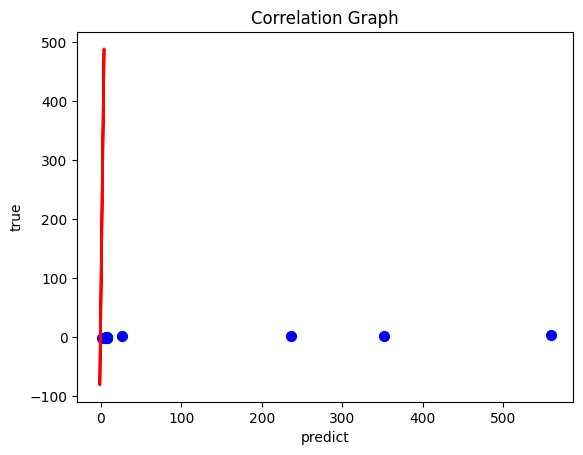

In [44]:
predit_val = predict.iloc[5]
true_val = y_test.iloc[5]
co_rel = np.corrcoef(predit_val,true_val)
plt.scatter(true_val,predit_val,s=50,c='blue')
m, b = np.polyfit(predit_val,true_val, 1)
line = m * predit_val + b
plt.plot(predit_val, line, color='red', linewidth=2)
plt.xlabel('predict')
plt.ylabel('true')
plt.title('Correlation Graph')

# Add a text box with the correlation coeffici

# Show the plot
plt.show()

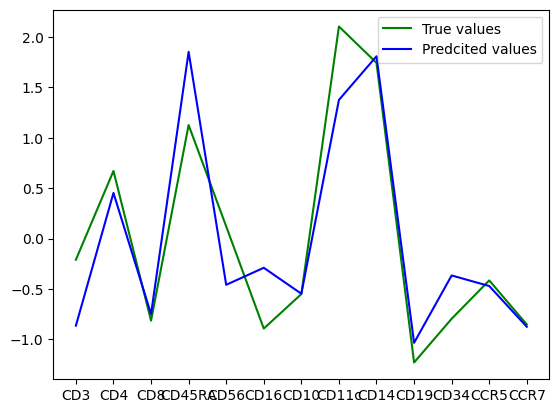

In [98]:
plt.plot(true_val,label='True values',color='green')
plt.plot(predit_val,label='Predcited values',color='blue')
plt.legend()
plt.show()